In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import *

In [3]:
def plot(d):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    X = []
    Y = []
    distribution = []

    d = {k: d[k] for k in sorted(d)}
    for label, preds in d.items():
        X.append(label)
        Y.append(np.mean(preds))
        distribution.append(len(preds))

    axes[0].set_xlabel('True class')
    axes[0].set_ylabel('Average Predicted class')
    axes[0].plot(X, Y, 'o-', label='pred')
    axes[0].plot(range(len(X)), 'o-', label='true')
    axes[0].grid()
    axes[0].legend()

    axes[1].set_xlabel('Class')
    axes[1].set_ylabel('Number of events')
    axes[1].grid()
    axes[1].plot(distribution, 'o-')

In [8]:
root_uuid = '020_RX100_resized_128'

d = defaultdict(list)

for i in range(5):
    uuid = f'{root_uuid}/{i}'
    model, config = load_model_locally(uuid, device='cpu')
    datapool = DataPool(config.testing_files, config)

    for video in datapool:
        from_time, till_time = video.get_from_till_time(Part.WHOLE)

        preds, probs = validate_video(video, model, from_time=from_time, till_time=till_time)
        labels = get_labels(video, from_time, till_time)

        for prediction, label in zip(preds['n_counts'], labels['n_counts']):
            d[label].append(prediction)

Video loading:   0%|          | 0/8 [00:00<?, ?it/s]

Video loading:   0%|          | 0/7 [00:00<?, ?it/s]

Video loading:   0%|          | 0/7 [00:00<?, ?it/s]

Video loading:   0%|          | 0/7 [00:00<?, ?it/s]

Video loading:   0%|          | 0/7 [00:00<?, ?it/s]

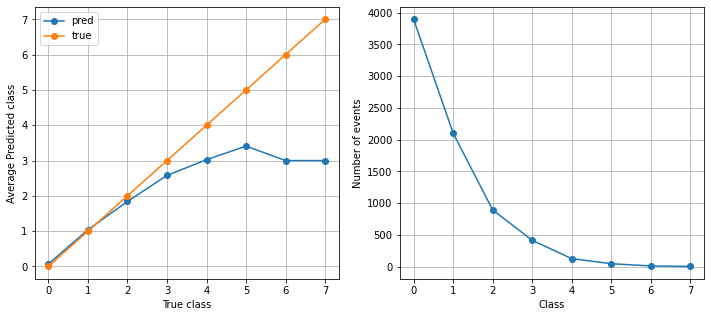

In [9]:
plot(d)

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

Video loading:   0%|          | 0/2 [00:00<?, ?it/s]

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

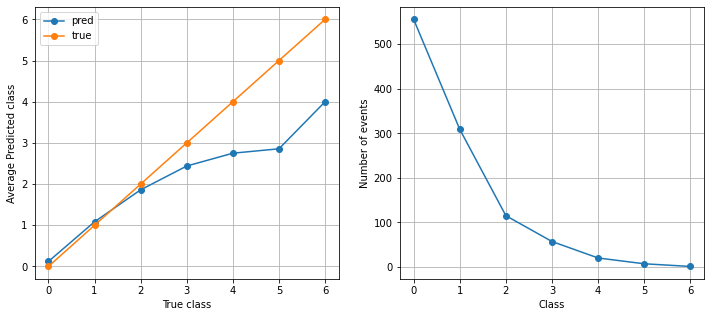

In [10]:
d_worst = defaultdict(list)

worst_selected = [
    '41_Dobrejovice_RX100',
    '29_KPrehradam_RX100',
    '07_RX100',
    '13_RX100',
    '33_Vypadova_RX100'   
]

for i in range(5):
    uuid = f'010_eyedea_RX100_1/{i}'
    model, config = load_model_locally(uuid, device='cpu')
    files = config.testing_files
    files = np.intersect1d(files, worst_selected)

    if len(files) == 0: continue

    datapool = DataPool(files, config)
    
    for video in datapool:
        from_time, till_time = video.get_from_till_time(Part.WHOLE)

        preds, probs = validate_video(video, model, from_time=from_time, till_time=till_time)
        labels = get_labels(video, from_time, till_time)

        for prediction, label in zip(preds['n_counts'], labels['n_counts']):
            d_worst[label].append(prediction)
    
plot(d_worst)

[]
['35_Rovinska_RX100']


Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

['06_RX100' '11_RX100' '21_Videnska_RX100']


Video loading:   0%|          | 0/3 [00:00<?, ?it/s]

[]
['34_PrazskaDobrichovice_RX100']


Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

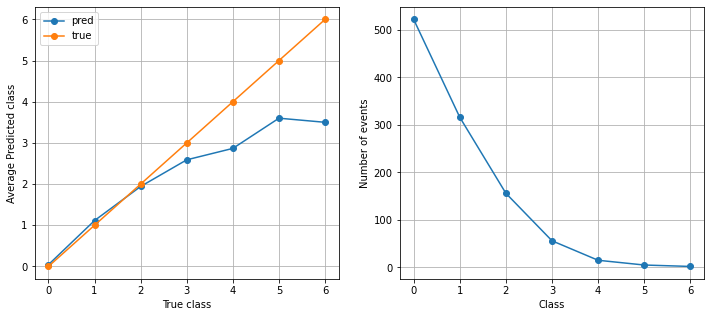

In [23]:
d_best = defaultdict(list)

best_selected = [
    '21_Videnska_RX100',
    '35_Rovinska_RX100',
    '11_RX100',
    '06_RX100',
    '34_PrazskaDobrichovice_RX100',
]

for i in range(5):
    uuid = f'010_eyedea_RX100_1/{i}'
    model, config = load_model_locally(uuid, device='cpu')
    files = config.testing_files
    files = np.intersect1d(files, best_selected)

    print(files)

    if len(files) == 0: continue

    datapool = DataPool(files, config)
    
    for video in datapool:
        from_time, till_time = video.get_from_till_time(Part.WHOLE)

        preds, probs = validate_video(video, model, from_time=from_time, till_time=till_time)
        labels = get_labels(video, from_time, till_time)

        for prediction, label in zip(preds['n_counts'], labels['n_counts']):
            d_best[label].append(prediction)
    
plot(d_best)

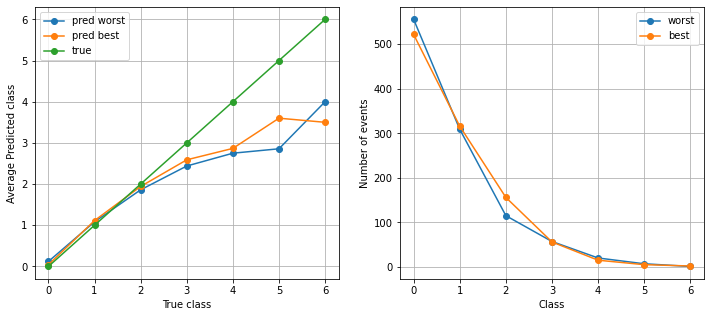

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


def plot_d(d, ax1, ax2, plot_label):
    X = []
    Y = []
    distribution = []
    d = {k: d[k] for k in sorted(d)}
    for label, preds in d.items():
        X.append(label)
        Y.append(np.mean(preds))
        distribution.append(len(preds))
    ax1.plot(X, Y, 'o-', label=f'pred {plot_label}')
    ax2.plot(distribution, 'o-', label=plot_label)

    return X

X = plot_d(d_worst, axes[0], axes[1], 'worst')
X = plot_d(d_best, axes[0], axes[1], 'best')

axes[0].set_xlabel('True class')
axes[0].set_ylabel('Average Predicted class')
axes[0].plot(range(len(X)), 'o-', label='true')
axes[0].legend()
axes[0].grid()

axes[1].set_xlabel('Class')
axes[1].set_ylabel('Number of events')
axes[1].legend()
axes[1].grid()

In [20]:
d_worst[6], d_best[6]

([4], [3, 4])

In [26]:
np.sum([np.sum(d_best[k]) for k in d_best.keys()])

890

In [27]:
128 + 184 + 214 + 38 + 329


893